# train/test 셋 분리 실습
 - 목적: 주어진 도미와 빙어 데이터를 sklearn 활용해서, train/test data를 분리한다, 표준화를 시켜준다 분리된 데이터를 이용해 기계학습을 진행한다.
 - Input: 도미, 빙어의 길이와 무게 데이터 묶음 (List형태)
 - Output: 입력 데이터를 이용해, train / test 형태의 기계학습에 맞는 데이터로 변환 (List) [(25.4,242.0),(26.3,290.0),....]

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
#sklearn의 학습데이터 형태로 preprocessing

In [6]:
fish_data = np.column_stack((fish_length, fish_weight))

In [8]:
fish_data.shape

(49, 2)

In [14]:
#np.ones(35) + np.zeros(14)
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [15]:
from sklearn.model_selection import train_test_split

In [26]:
train_input, test_input, train_target, test_target =  train_test_split(fish_data, fish_target,  test_size=0.27, stratify=fish_target)

In [27]:
train_input.shape

(35, 2)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
kn = KNeighborsClassifier(n_neighbors=3)

In [38]:
kn.fit(train_input, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [39]:
kn.score(test_input, test_target)

1.0

In [40]:
test_target

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.])

In [41]:
kn.predict([[25, 150]])

array([0.])

In [42]:
import matplotlib.pyplot as plt


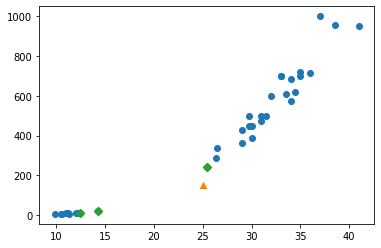

In [43]:
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

In [45]:
print(train_input
      [indexes])

[[[ 25.4 242. ]
  [ 14.3  19.7]
  [ 12.4  13.4]]]


(0.0, 1000.0)

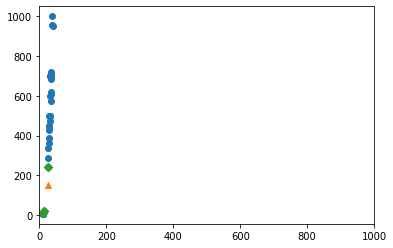

In [47]:
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0,1000))

In [57]:
#표준화 (X - m) / std

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [58]:
std

array([  9.88209843, 306.03851952])

In [61]:
train_scaled = (train_input - mean) / std

In [62]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [65]:
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [70]:
a_sample = ([25, 150] - mean) / std
kn.predict([([25, 150] - mean) / std])

array([1.])

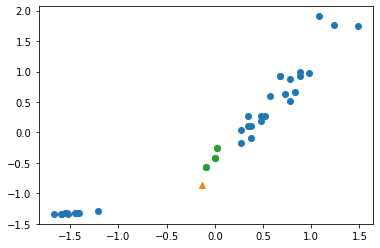

In [74]:
distances, indexes = kn.kneighbors([a_sample])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(a_sample[0], a_sample[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])